In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

from utils import *
from decode import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
with open('data/texts/feynman.txt', 'r') as file1:
    text1 = file1.readline()
    
with open('data/texts/milton.txt', 'r') as file2:
    text2 = file2.readline()
    
with open('data/texts/tolstoy.txt', 'r') as file3:
    text3 = file3.readline()

In [3]:
def pick_random_text():
    text_number = np.random.randint(3)
    if text_number == 0:
        return text1
    elif text_number == 1:
        return text2
    else:
        return text3

In [4]:
def generate_test_data(has_breakpoint):
    plaintexts, ciphertexts = [], []
    for i in range(ITERATIONS):
        plaintext = get_random_substring(pick_random_text())
        plainnumbers = text_to_number(plaintext)
        if has_breakpoint:
            f1, f2, b = sample_f(), sample_f(), sample_b(len(plaintext))
            ciphernumbers = decode_with_b(f1, f2, b, plainnumbers)
        else:
            f = sample_f()
            ciphernumbers = decode_with_f(f, plainnumbers)
        plaintexts.append(plaintext)
        ciphertexts.append(number_to_text(ciphernumbers))
    return plaintexts, ciphertexts

In [8]:
ITERATIONS = 10
has_breakpoint = True

In [9]:
plaintexts, ciphertexts = generate_test_data(has_breakpoint)

In [12]:
accuracies, times = np.zeros(ITERATIONS), np.zeros(ITERATIONS)
for i in range(ITERATIONS):
    start = time.time()
    guess = decode(ciphertexts[i], has_breakpoint)
    end = time.time()
    
    a = lambda o, g: get_accuracy(text_to_number(o), text_to_number(g))
    accuracy = a(plaintexts[i], guess)
    accuracies[i], times[i] = accuracy, (end - start)
    print(accuracies[i], times[i])

0.861576354679803 229.2386510372162
0.854494382022472 215.2114613056183
0.9246376811594202 165.50814151763916
0.7795275590551181 204.73707175254822
0.711340206185567 177.05260372161865
0.6666666666666666 180.97149801254272
0.8093385214007782 156.9533395767212
0.8477951635846372 226.98833346366882
0.7952415284787311 194.80025482177734
0.7375366568914956 190.55581045150757


In [ ]:
''' 
ensemble 100, max_iters 5000, stop 1000
0.8596059113300493 65.78884530067444
0.8601123595505618 64.70300793647766
0.7623188405797101 55.46209692955017
0.7858267716535433 61.18997359275818
0.561119293078056 56.70769786834717
0.5200803212851406 54.12625241279602
0.7198443579766537 51.95302772521973
0.813655761024182 56.15900254249573
0.7901946647440519 55.086676359176636
0.6304985337243402 56.97266125679016


ensemble 250, max_iters 5000, stop 1000
0.829064039408867 162.2974443435669
0.8258426966292135 153.60858631134033
0.8927536231884058 136.47143983840942
0.8582677165354331 163.68277645111084
0.5773195876288659 134.0021870136261
0.714859437751004 126.18412017822266
0.7315175097276264 118.22114968299866
0.8250355618776671 142.38429164886475
0.8529199711607787 136.86985325813293
0.7360703812316716 144.81619262695312

ensemble 250, max_iters 10000, stop 1000
0.861576354679803 229.2386510372162
0.854494382022472 215.2114613056183
0.9246376811594202 165.50814151763916
0.7795275590551181 204.73707175254822
0.711340206185567 177.05260372161865
0.6666666666666666 180.97149801254272
0.8093385214007782 156.9533395767212
0.8477951635846372 226.98833346366882
0.7952415284787311 194.80025482177734
0.7375366568914956 190.55581045150757
'''

[0.125 0.154 0.168 0.148 0.108 0.086 0.063 0.06  0.044 0.044]


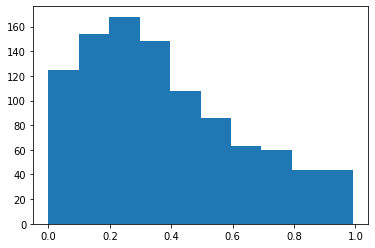

In [31]:
n, _, _ = plt.hist(accuracies, bins=10)
print(np.array(n) / ITERATIONS)

0.6585926463603974


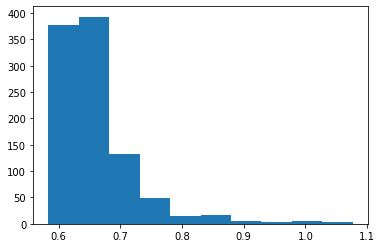

In [32]:
plt.hist(times)
print(np.array(times).mean())

In [23]:
def get_ensemble_stats(N, accuracy, time):
    return (1-accuracy)**N, N*time

In [24]:
for n in [1, 5, 10, 25, 50, 100]:
    print(n, get_ensemble_stats(n, .563, .235))

1 (0.43700000000000006, 0.235)
5 (0.01593702246595701, 1.1749999999999998)
10 (0.00025398868508041847, 2.3499999999999996)
25 (1.0281013377812518e-09, 5.875)
50 (1.0569923607475995e-18, 11.75)
100 (1.1172328506787835e-36, 23.5)
